In [1]:
import polars as pl
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
selected_cols = ["DATE", "TAVG", "TMAX", "TMIN"]
lf_1945 = pl.scan_csv("data/1945T1955.csv").select(selected_cols)
lf_1955 = pl.scan_csv("data/1955T1965.csv").select(selected_cols)
lf_1965 = pl.scan_csv("data/1965T1975.csv").select(selected_cols)
lf_1975 = pl.scan_csv("data/1975T1985.csv").select(selected_cols)
lf_1985 = pl.scan_csv("data/1985T1995.csv").select(selected_cols)
lf_1995 = pl.scan_csv("data/1995T2005.csv").select(selected_cols)
lf_2005 = pl.scan_csv("data/2005T2015.csv").select(selected_cols)
lf_2015 = pl.scan_csv("data/2015T2025.csv").select(selected_cols)

lf_1945 = lf_1945.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1955 = lf_1955.with_columns(

    pl.col("TAVG").cast(pl.Int64),
    pl.col("DATE").str.to_date(format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
    
)

lf_1965 = lf_1965.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1975 = lf_1975.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1985 = lf_1985.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_1995 = lf_1995.with_columns(

    pl.col("TAVG").cast(pl.Int64)
    
)

lf_2005 = lf_2005.with_columns(

    pl.col("TAVG").cast(pl.Int64),
    pl.col("DATE").str.to_date(format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
    
)

In [3]:
lf_full = pl.concat([lf_1945, lf_1955, lf_1965, lf_1975, lf_1985, lf_1995, lf_2005, lf_2015], how='vertical')
lf_full.collect()

DATE,TAVG,TMAX,TMIN
str,i64,i64,i64
"""1954-04-01""",null,78,67
"""1954-04-02""",null,78,69
"""1954-04-03""",null,73,65
"""1954-04-04""",null,76,60
"""1954-04-05""",null,79,63
…,…,…,…
"""2025-08-10""",78,89,67
"""2025-08-11""",80,91,69
"""2025-08-12""",82,89,75


In [4]:
lf_full.describe()

statistic,DATE,TAVG,TMAX,TMIN
str,str,f64,f64,f64
"""count""","""26069""",7186.0,26049.0,25951.0
"""null_count""","""0""",18883.0,20.0,118.0
"""mean""",null,76.317562,84.1916,67.54522
"""std""",null,4.595622,4.097892,4.604441
"""min""","""1954-04-01""",0.0,65.0,48.0
"""25%""",null,74.0,81.0,64.0
"""50%""",null,77.0,85.0,68.0
"""75%""",null,79.0,87.0,71.0
"""max""","""2025-08-14""",86.0,97.0,79.0


In [5]:
x_labels = lf_full.select("DATE").filter(pl.col("DATE").str.ends_with("5-01-01")).collect().to_series()

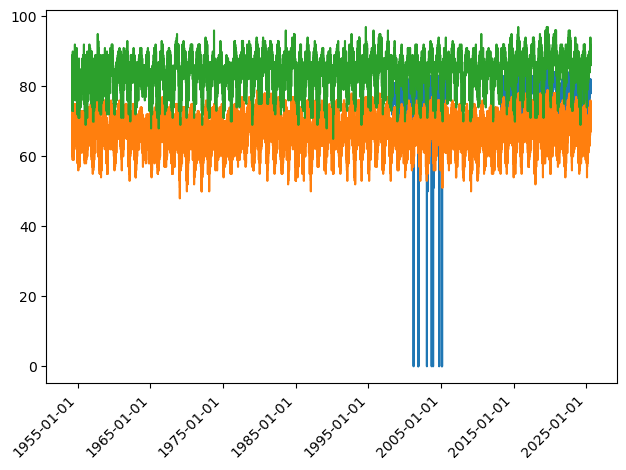

In [6]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMIN").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

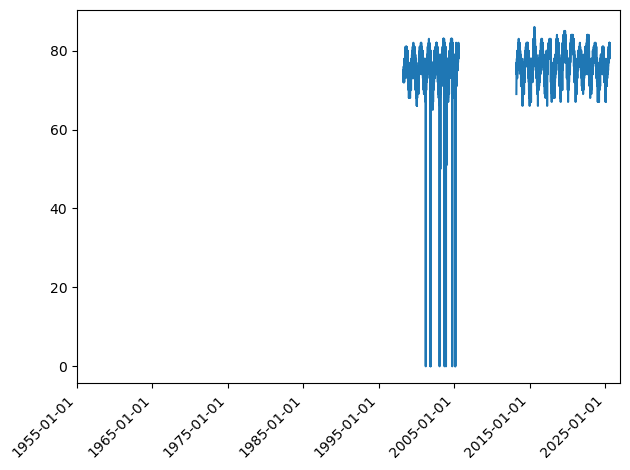

In [7]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
lf_full = lf_full.with_columns(

    pl.col("TAVG").shift(-1).alias("TAVG_NEXT"),
    pl.col("TAVG").shift(1).alias("TAVG_PREV"),
    pl.col("DATE").str.slice(5, 10).alias("DAY")
    
)
lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY
str,i64,i64,i64,i64,i64,str
"""1954-04-01""",null,78,67,null,null,"""04-01"""
"""1954-04-02""",null,78,69,null,null,"""04-02"""
"""1954-04-03""",null,73,65,null,null,"""04-03"""
"""1954-04-04""",null,76,60,null,null,"""04-04"""
"""1954-04-05""",null,79,63,null,null,"""04-05"""
…,…,…,…,…,…,…
"""2025-08-10""",78,89,67,80,79,"""08-10"""
"""2025-08-11""",80,91,69,82,78,"""08-11"""
"""2025-08-12""",82,89,75,80,80,"""08-12"""


In [9]:
lf_full = lf_full.with_columns(

    pl.when((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX")))
        .then((pl.col("TAVG_NEXT") + pl.col("TAVG_PREV")) / 2)
        .otherwise(pl.col("TAVG")).alias("TAVG")

)

lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY
str,f64,i64,i64,i64,i64,str
"""1954-04-01""",null,78,67,null,null,"""04-01"""
"""1954-04-02""",null,78,69,null,null,"""04-02"""
"""1954-04-03""",null,73,65,null,null,"""04-03"""
"""1954-04-04""",null,76,60,null,null,"""04-04"""
"""1954-04-05""",null,79,63,null,null,"""04-05"""
…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,"""08-10"""
"""2025-08-11""",80.0,91,69,82,78,"""08-11"""
"""2025-08-12""",82.0,89,75,80,80,"""08-12"""


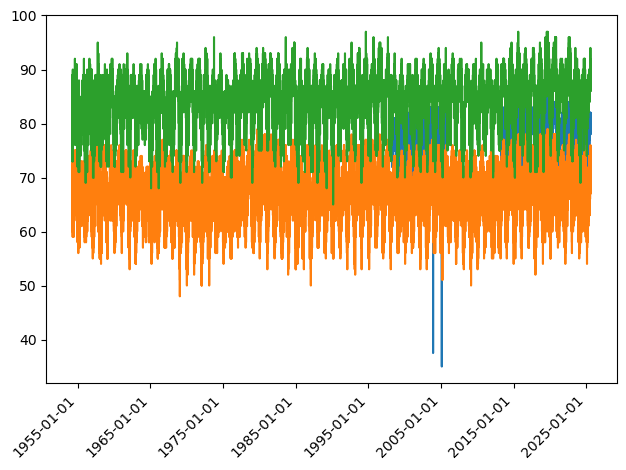

In [10]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMIN").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [11]:
noise = lf_full.filter((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX")))
noise.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY
str,f64,i64,i64,i64,i64,str
"""2003-12-01""",39.0,77,72,0,78,"""12-01"""
"""2003-12-02""",37.5,73,70,75,0,"""12-02"""
"""2005-01-02""",73.5,73,67,73,74,"""01-02"""
"""2005-02-12""",35.0,77,66,0,70,"""02-12"""
"""2005-02-13""",36.0,75,66,72,0,"""02-13"""


In [12]:
lf_full_no_noise = lf_full.filter(~(pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX"))).select("DAY", "TAVG", "TMAX", "TMIN")
lf_full_no_noise = lf_full_no_noise.with_columns(

    ((pl.col("TAVG") - pl.col("TMIN")) / (pl.col("TMAX") - pl.col("TMIN"))).alias("AVG_INDEX")

)
avg_index_daygb = lf_full_no_noise.select(["DAY", "AVG_INDEX"]).group_by("DAY").mean()
avg_index_daygb.collect()

DAY,AVG_INDEX
str,f64
"""09-05""",0.476809
"""07-02""",0.489418
"""06-30""",0.494141
"""09-22""",0.455709
"""12-28""",0.504888
…,…
"""09-12""",0.485309
"""12-04""",0.495784
"""06-13""",0.484856


In [13]:
lf_full = lf_full.join(avg_index_daygb, on="DAY")
lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX
str,f64,i64,i64,i64,i64,str,f64
"""1954-04-01""",null,78,67,null,null,"""04-01""",0.509094
"""1954-04-02""",null,78,69,null,null,"""04-02""",0.494966
"""1954-04-03""",null,73,65,null,null,"""04-03""",0.460848
"""1954-04-04""",null,76,60,null,null,"""04-04""",0.49379
"""1954-04-05""",null,79,63,null,null,"""04-05""",0.487971
…,…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,"""08-10""",0.461912
"""2025-08-11""",80.0,91,69,82,78,"""08-11""",0.472883
"""2025-08-12""",82.0,89,75,80,80,"""08-12""",0.468168


In [14]:
lf_full = lf_full.with_columns(

    pl.when((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX")))
    .then(pl.col("AVG_INDEX") * (pl.col("TMAX") - pl.col("TMIN")) + pl.col("TMIN"))
    .otherwise(pl.col("TAVG")).alias("TAVG")

)

lf_full.collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX
str,f64,i64,i64,i64,i64,str,f64
"""1954-04-01""",null,78,67,null,null,"""04-01""",0.509094
"""1954-04-02""",null,78,69,null,null,"""04-02""",0.494966
"""1954-04-03""",null,73,65,null,null,"""04-03""",0.460848
"""1954-04-04""",null,76,60,null,null,"""04-04""",0.49379
"""1954-04-05""",null,79,63,null,null,"""04-05""",0.487971
…,…,…,…,…,…,…,…
"""2025-08-10""",78.0,89,67,80,79,"""08-10""",0.461912
"""2025-08-11""",80.0,91,69,82,78,"""08-11""",0.472883
"""2025-08-12""",82.0,89,75,80,80,"""08-12""",0.468168


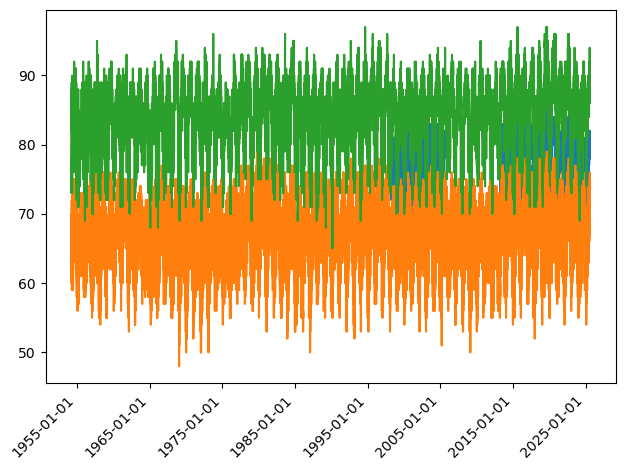

In [15]:
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TAVG").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMIN").collect().to_series())
plt.plot(lf_full.select("DATE").collect().to_series(), lf_full.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [17]:
lf_full.filter((pl.col("TAVG") < pl.col("TMIN")) | (pl.col("TAVG") > pl.col("TMAX"))).collect()

DATE,TAVG,TMAX,TMIN,TAVG_NEXT,TAVG_PREV,DAY,AVG_INDEX
str,f64,i64,i64,i64,i64,str,f64


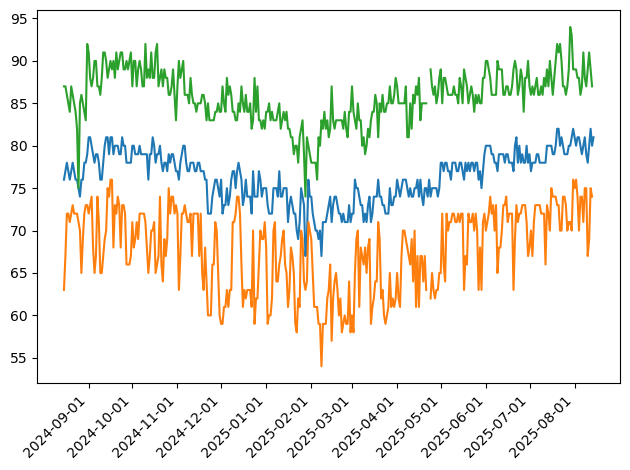

In [21]:
lf_tail = lf_full.tail(365)
x_labels = lf_tail.select("DATE").filter(pl.col("DATE").str.ends_with("01")).collect().to_series()
plt.plot(lf_tail.select("DATE").collect().to_series(), lf_tail.select("TAVG").collect().to_series())
plt.plot(lf_tail.select("DATE").collect().to_series(), lf_tail.select("TMIN").collect().to_series())
plt.plot(lf_tail.select("DATE").collect().to_series(), lf_tail.select("TMAX").collect().to_series())
plt.xticks(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()